## Ritm Yönergesi

### Ritim Soru Üretimi için Ritmik Hücre Bankaları ve Yönergeler 
Önbilgiler 
(Kullanıcı tercihi) Ölçü sayısı: 1-2
(Kullanıcı tercihi) Zaman İşareti seçenekleri: 2-5 (2/4, ¾, 4/4, 5/4)
Örnek:
Ölçü sayısını belirleyin (1-2): (Input1: a)
Ölçü zamanını belirleyin (2-5): (Input2: b)
Aşağıdaki figürlerde (Figür 1 ve Figür 2) Level 1 ve Level 2 olmak üzere iki ayrı 
kademe, bu kademeler içinde üç farklı seviye (A, B, C), bu seviyelerde 
kullanılabilir 1-zamana denk gelen 4’e veya 3’e bölünmüş ritmik hücreler (Cell) 
ve her 1-zamanlı ritmik hücre içerisindeki vuruş sayısı (Quantity (Q))
verilmiştir;

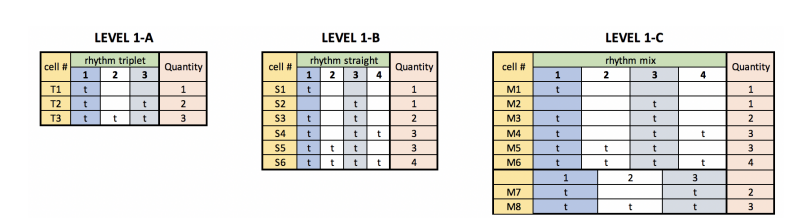
Figür 1. Level 1 Ritmik Hücre Bankaları 
 
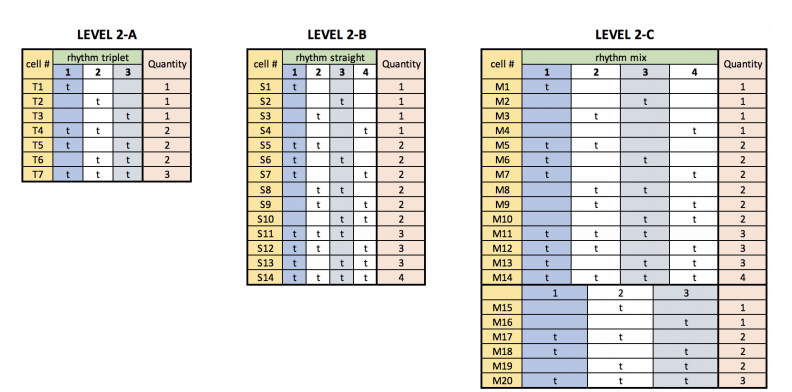
Figür 2. Level 2 Ritmik Hücre Bankaları 
 
 
 
Yönergeler 
İki kademe ve üç seviyeden biri seçildikten sonra, bu seviyenin içinde yer alan 
ritmik hücreler seçkisiz (random) kullanılarak ritimler üretilecektir. Burada 
dikkat edilecek hususlar;
• Kullanılan ritmik hücre sayısı Ölçü Sayısı X Ölçü Zamanı (ab) kadar
olmalıdır. 
• Aynı ritmik hücre ardarda en fazla 3 kez kullanılabilir.
• Seçilen hücrelerdeki vuruş sayıları (Q) toplanacaktır (Total Q).
• 9 < Total Q < 15
• Kullanılacak ilk hücrede 1.bölünüm dolu olmalıdır; Örneğin Level 1-B 
bankası seçildiğinde kullanılacak ilk ritmik hücre S2 olamaz çünkü bu 
hücrede ilk vuruş 3.bölünümde yer almaktadır.
Örnek#1
Ölçü sayısını belirleyin (1-2): 2 (Input1: a)
Ölçü zamanını belirleyin (2-5): 4 (Input2: b)
ab = 8 à Ritmik Hücreler 8 kere kullanılacaktır
Seviye 1-B bankasından rastgele üretelim;
• S1 – S4 – S3 – S6 – S5 – S2 – S5 – S4;

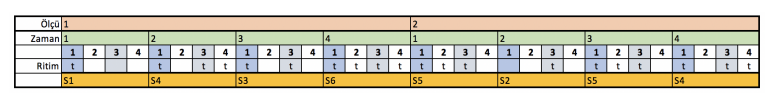
Total Q = 20,  
Total Q > 15 tekrar rastgele üretelim;
• S1 – S6- S2 – S3 – S2 – S4 – S1 – S1
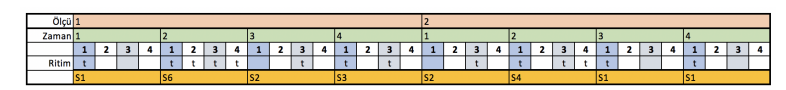

Total Q = 14
Output #1 
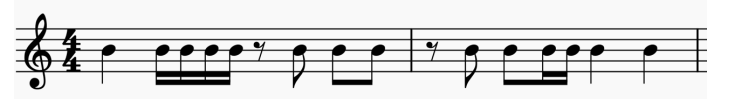

### Eğer daha önce yüklenmediyse music21 kütüphanesini yüklenir

In [1]:
#pip install music21

### Eğer daha önce yüklenmediyse FPDF kütüphanesini yüklenir. Bu kütüphane ile oluşturulan ritim skorları pdf dosyasına render edilerek yazılır.

In [2]:
#pip install FPDF

## Gerekli kütüphaneler yüklenir

In [3]:
import numpy as np
import pandas as pd
from random import seed
from random import randint
from music21 import *
import music21 as m21
from fpdf import FPDF
from IPython.display import Image, Audio
import os
import pickle

### Music21 kütüphanesinin müzik skorlarını ekrana yazabilmesi için LiliyPond ile bağlantı yapılır. Daha önceden bilgisayara LilyPond yüklenmiş olması gerekiyor

In [4]:
#us = m21.environment.UserSettings()
#us['lilypondPath'] = 'C:/LilyPond/usr/bin/lilypond.exe'

### Ritm oluşturma yönergesindeki yer alan ve ritimleri oluştururken kullanılacak tablolar sisteme tanıtılır.

In [5]:
level_1A_t = np.array([['Level1A', 1 , 0 , 0] , ['Level1A',1, 0, 1] , ['Level1A',1 ,1 ,1] ])
df_triplet_1A = pd.DataFrame(level_1A_t, columns = ['Level' , 'Triplet-1','Triplet-2','Triplet-3'], index = ['T1', 'T2', 'T3'])
df_triplet_1A['Cell'] = df_triplet_1A.index
df_triplet_1A['Triplet-1'] = df_triplet_1A['Triplet-1'].astype(int)
df_triplet_1A['Triplet-2'] = df_triplet_1A['Triplet-2'].astype(int)
df_triplet_1A['Triplet-3'] = df_triplet_1A['Triplet-3'].astype(int)
df_triplet_1A['Q'] = df_triplet_1A['Triplet-1']+ df_triplet_1A['Triplet-2'] + df_triplet_1A['Triplet-3']
df_triplet_1A

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q
T1,Level1A,1,0,0,T1,1
T2,Level1A,1,0,1,T2,2
T3,Level1A,1,1,1,T3,3


In [6]:
level_1B_f = np.array([['Level1B',1, 0 , 0 , 0 ] , ['Level1B',0, 0, 1 , 0], ['Level1B',1 ,0 ,1, 0], 
                      ['Level1B',1 ,0 ,1, 1] , ['Level1B',1 ,1 ,1, 0], ['Level1B',1 ,1 ,1, 1]])
df_fourth_1B = pd.DataFrame(level_1B_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'], 
                           index = ['S1', 'S2', 'S3', 'S4' , 'S5', 'S6'])
df_fourth_1B['Cell'] = df_fourth_1B.index
df_fourth_1B['Straight-1'] = df_fourth_1B['Straight-1'].astype(int)
df_fourth_1B['Straight-2'] = df_fourth_1B['Straight-2'].astype(int)
df_fourth_1B['Straight-3'] = df_fourth_1B['Straight-3'].astype(int)
df_fourth_1B['Straight-4'] = df_fourth_1B['Straight-4'].astype(int)
df_fourth_1B['Q'] = df_fourth_1B['Straight-1']+df_fourth_1B['Straight-2']+df_fourth_1B['Straight-3']+df_fourth_1B['Straight-4']
df_fourth_1B

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q
S1,Level1B,1,0,0,0,S1,1
S2,Level1B,0,0,1,0,S2,1
S3,Level1B,1,0,1,0,S3,2
S4,Level1B,1,0,1,1,S4,3
S5,Level1B,1,1,1,0,S5,3
S6,Level1B,1,1,1,1,S6,4


In [7]:
level_1C1_f = np.array([['Level1C',1 ,0 ,0, 0] , ['Level1C',0 ,0 ,1, 0], ['Level1C',1 ,0 ,1, 0],
                      ['Level1C',1 ,0 ,1, 1] , ['Level1C',1 ,1 ,1, 0], ['Level1C',1 ,1 ,1, 1]])
df_fourth_1C1 = pd.DataFrame(level_1C1_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'], 
                           index = ['M1', 'M2', 'M3', 'M4' , 'M5', 'M6'])
df_fourth_1C1['Cell'] = df_fourth_1C1.index
df_fourth_1C1['Straight-1'] = df_fourth_1C1['Straight-1'].astype(int)
df_fourth_1C1['Straight-2'] = df_fourth_1C1['Straight-2'].astype(int)
df_fourth_1C1['Straight-3'] = df_fourth_1C1['Straight-3'].astype(int)
df_fourth_1C1['Straight-4'] = df_fourth_1C1['Straight-4'].astype(int)
df_fourth_1C1['Q'] = df_fourth_1C1['Straight-1']+df_fourth_1C1['Straight-2']+df_fourth_1C1['Straight-3']+df_fourth_1C1['Straight-4']
df_fourth_1C1

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q
M1,Level1C,1,0,0,0,M1,1
M2,Level1C,0,0,1,0,M2,1
M3,Level1C,1,0,1,0,M3,2
M4,Level1C,1,0,1,1,M4,3
M5,Level1C,1,1,1,0,M5,3
M6,Level1C,1,1,1,1,M6,4


In [8]:
level_1C2_t = np.array([['Level1C',1,0,1] , ['Level1C',1,1,1]])
df_triplet_1C2 = pd.DataFrame(level_1C2_t, columns = ['Level','Triplet-1','Triplet-2','Triplet-3'], index = ['M7' , 'M8'])
df_triplet_1C2['Cell'] = df_triplet_1C2.index
df_triplet_1C2['Triplet-1'] = df_triplet_1C2['Triplet-1'].astype(int)
df_triplet_1C2['Triplet-2'] = df_triplet_1C2['Triplet-2'].astype(int)
df_triplet_1C2['Triplet-3'] = df_triplet_1C2['Triplet-3'].astype(int)
df_triplet_1C2['Q'] = df_triplet_1C2['Triplet-1']+ df_triplet_1C2['Triplet-2'] + df_triplet_1C2['Triplet-3']
df_triplet_1C2

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q
M7,Level1C,1,0,1,M7,2
M8,Level1C,1,1,1,M8,3


In [9]:
level_2A_t = np.array([['Level2A', 1 , 0 , 0] , ['Level2A',0, 1, 0] , ['Level2A',0 ,0 ,1] , ['Level2A',1 ,1 ,0] ,
                      ['Level2A', 1 , 0 , 1] , ['Level2A',0, 1, 1] , ['Level2A',1 ,1 ,1]])
df_triplet_2A = pd.DataFrame(level_2A_t, columns = ['Level','Triplet-1','Triplet-2','Triplet-3'], index = ['T1', 'T2', 'T3','T4', 'T5', 'T6','T7'])
df_triplet_2A['Cell'] = df_triplet_2A.index
df_triplet_2A['Triplet-1'] = df_triplet_2A['Triplet-1'].astype(int)
df_triplet_2A['Triplet-2'] = df_triplet_2A['Triplet-2'].astype(int)
df_triplet_2A['Triplet-3'] = df_triplet_2A['Triplet-3'].astype(int)
df_triplet_2A['Q'] = df_triplet_2A['Triplet-1']+ df_triplet_2A['Triplet-2'] + df_triplet_2A['Triplet-3']
df_triplet_2A

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q
T1,Level2A,1,0,0,T1,1
T2,Level2A,0,1,0,T2,1
T3,Level2A,0,0,1,T3,1
T4,Level2A,1,1,0,T4,2
T5,Level2A,1,0,1,T5,2
T6,Level2A,0,1,1,T6,2
T7,Level2A,1,1,1,T7,3


In [10]:
level_2B_f = np.array([['Level2B', 1, 0, 0, 0], ['Level2B', 0, 0, 1, 0], ['Level2B', 0, 1, 0, 0], ['Level2B', 0, 0, 0, 1],
                      ['Level2B', 1, 1, 0, 0], ['Level2B', 1, 0, 1, 0], ['Level2B', 1, 0, 0, 1], 
                      ['Level2B', 0, 1, 1, 0], ['Level2B', 0, 1, 0, 1], ['Level2B', 0, 0, 1, 1], ['Level2B', 1, 1, 1, 0],
                      ['Level2B', 1, 1, 0, 1], ['Level2B', 1, 0, 1, 1], ['Level2B', 1, 1, 1, 1]])

df_fourth_2B = pd.DataFrame(level_2B_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'], 
                           index = ['S1', 'S2', 'S3', 'S4' , 'S5', 'S6', 'S7',
                                    'S8', 'S9', 'S10', 'S11' , 'S12', 'S13', 'S14'])
df_fourth_2B['Cell'] = df_fourth_2B.index
df_fourth_2B['Straight-1'] = df_fourth_2B['Straight-1'].astype(int)
df_fourth_2B['Straight-2'] = df_fourth_2B['Straight-2'].astype(int)
df_fourth_2B['Straight-3'] = df_fourth_2B['Straight-3'].astype(int)
df_fourth_2B['Straight-4'] = df_fourth_2B['Straight-4'].astype(int)
df_fourth_2B['Q'] = df_fourth_2B['Straight-1']+df_fourth_2B['Straight-2']+df_fourth_2B['Straight-3']+df_fourth_2B['Straight-4']
df_fourth_2B

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q
S1,Level2B,1,0,0,0,S1,1
S2,Level2B,0,0,1,0,S2,1
S3,Level2B,0,1,0,0,S3,1
S4,Level2B,0,0,0,1,S4,1
S5,Level2B,1,1,0,0,S5,2
S6,Level2B,1,0,1,0,S6,2
S7,Level2B,1,0,0,1,S7,2
S8,Level2B,0,1,1,0,S8,2
S9,Level2B,0,1,0,1,S9,2
S10,Level2B,0,0,1,1,S10,2


In [11]:
level_2C1_f = np.array([['Level2C', 1, 0, 0, 0], ['Level2C', 0, 0, 1, 0], ['Level2C', 0, 1, 0, 0], ['Level2C', 0, 0, 0, 1],
                      ['Level2C', 1, 1, 0, 0], ['Level2C', 1, 0, 1, 0], ['Level2C', 1, 0, 0, 1],
                      ['Level2C', 0, 1, 1, 0], ['Level2C', 0, 1, 0, 1], ['Level2C', 0, 0, 1, 1], ['Level2C', 1, 1, 1, 0],
                      ['Level2C', 1, 1, 0, 1], ['Level2C', 1, 0, 1, 1], ['Level2C', 1, 1, 1, 1]])

df_fourth_2C1 = pd.DataFrame(level_2C1_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'], 
                           index = ['M1', 'M2', 'M3', 'M4' , 'M5', 'M6', 'M7',
                                    'M8', 'M9', 'M10', 'M11' , 'M12', 'M13', 'M14'])
df_fourth_2C1['Cell'] = df_fourth_2C1.index
df_fourth_2C1['Straight-1'] = df_fourth_2C1['Straight-1'].astype(int)
df_fourth_2C1['Straight-2'] = df_fourth_2C1['Straight-2'].astype(int)
df_fourth_2C1['Straight-3'] = df_fourth_2C1['Straight-3'].astype(int)
df_fourth_2C1['Straight-4'] = df_fourth_2C1['Straight-4'].astype(int)
df_fourth_2C1['Q'] = df_fourth_2C1['Straight-1']+df_fourth_2C1['Straight-2']+df_fourth_2C1['Straight-3']+df_fourth_2C1['Straight-4']
df_fourth_2C1

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q
M1,Level2C,1,0,0,0,M1,1
M2,Level2C,0,0,1,0,M2,1
M3,Level2C,0,1,0,0,M3,1
M4,Level2C,0,0,0,1,M4,1
M5,Level2C,1,1,0,0,M5,2
M6,Level2C,1,0,1,0,M6,2
M7,Level2C,1,0,0,1,M7,2
M8,Level2C,0,1,1,0,M8,2
M9,Level2C,0,1,0,1,M9,2
M10,Level2C,0,0,1,1,M10,2


In [12]:
level_2C2_t = np.array([['Level2C',0,1,0], ['Level2C',0,0,1], ['Level2C',1,1,0],
                      ['Level2C',1,0,1], ['Level2C',0,1,1], ['Level2C',1,1,1]])
df_triplet_2C2 = pd.DataFrame(level_2C2_t, columns = ['Level','Triplet-1','Triplet-2','Triplet-3'], index = ['M15' , 'M16', 'M17', 'M18', 'M19', 'M20'])
df_triplet_2C2['Cell'] = df_triplet_2C2.index
df_triplet_2C2['Triplet-1'] = df_triplet_2C2['Triplet-1'].astype(int)
df_triplet_2C2['Triplet-2'] = df_triplet_2C2['Triplet-2'].astype(int)
df_triplet_2C2['Triplet-3'] = df_triplet_2C2['Triplet-3'].astype(int)
df_triplet_2C2['Q'] = df_triplet_2C2['Triplet-1']+ df_triplet_2C2['Triplet-2'] + df_triplet_2C2['Triplet-3']
df_triplet_2C2

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q
M15,Level2C,0,1,0,M15,1
M16,Level2C,0,0,1,M16,1
M17,Level2C,1,1,0,M17,2
M18,Level2C,1,0,1,M18,2
M19,Level2C,0,1,1,M19,2
M20,Level2C,1,1,1,M20,3


### Music21 librarysi kullanılarak oluşturulacak skorlardaki vuruşlar ve esler (farklı uzunluklar) için tanımlanır 

In [13]:
t = note.Note('B4')
t.duration = duration.Duration(1.0/3.0)

tt = note.Note('B4')
tt.duration = duration.Duration(2.0/3.0)

qes = note.Rest()
qes.duration.type = 'quarter'

q = note.Note('B4')
q.duration.type = 'quarter'

eight = note.Note('B4')
eight.duration = duration.Duration(0.5)

qdot = note.Note('B4')
qdot.duration = duration.Duration(0.75/1)

eightdot = note.Note('B4')
eightdot.duration = duration.Duration(0.75)

eightdotes = note.Rest()
eightdotes.duration = duration.Duration(0.75)

qesdot = note.Rest()
qesdot.duration = duration.Duration(0.75/1)

eightes = note.Rest()
eightes.duration = duration.Duration(0.5)

sixteenthes = note.Rest()
sixteenthes.duration = duration.Duration(0.25)

tripletes = note.Rest()
tripletes.duration = duration.Duration(1.0/3.0)
tripletes.duration.tuplets[0].tupletNormalShow = 'number'

tripleteses = note.Rest()
tripleteses.duration = duration.Duration(2.0/3.0)
tripleteses.duration.tuplets[0].tupletNormalShow = 'number'

sixteenth = note.Note('B4')
sixteenth.duration = duration.Duration(0.25)


### Ritm oluşturma yönergesinde tanımlanan formül

In [15]:
def calculateritm(seviye, opsiyon, olcu_sayisi,zaman_isareti):
    
    if (seviye==1 and opsiyon==1):
        my_ritmtable = df_triplet_1A
        ritim_table = 0
    if (seviye==1 and opsiyon==2):
        my_ritmtable = df_fourth_1B
        ritim_table = 1
    if (seviye==1 and opsiyon==3):
        my_ritmtable1 = df_fourth_1C1 
        my_ritmtable2 = df_triplet_1C2
        ritim_table = 2

    if (seviye==2 and opsiyon==1):
        my_ritmtable = df_triplet_2A
        ritim_table = 0
    if (seviye==2 and opsiyon==2):
        my_ritmtable = df_fourth_2B
        ritim_table = 1
    if (seviye==2 and opsiyon==3):
        my_ritmtable1 = df_fourth_2C1 
        my_ritmtable2 = df_triplet_2C2
        ritim_table = 2    
    
    

    olcu_zamani = zaman_isareti
    zorluk_derecesi_ust = 15
    zorluk_derecesi_alt = 9
    toplam_olcu = olcu_sayisi * olcu_zamani    
    final_ritm_count = 3
        
    deneme  = 0
    Q_total = 0
    ritm_count = 1 

    
    
    while ((Q_total>=zorluk_derecesi_ust or Q_total<=zorluk_derecesi_alt) or final_ritm_count>=3):
        
        final_ritm_count = 0
        Q_total = 0 
        ritm_count = 1 
        deneme +=1
        my_ritim = ""
        my_ritim_list = []
        temp_ritm ="";
        for i in range(toplam_olcu):
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                else:
                    ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count
                    temp_ritm = my_ritmtable.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==1):  
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                else:
                    ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable.iat[ritim, 5]
                #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==2):
                ritim_table_sub = randint(0,1)
                if (ritim_table_sub==0):
                    ritim = randint(0, len(my_ritmtable1)-1)
                    my_ritim = my_ritim + my_ritmtable1.iat[ritim, 5] + " "
                    my_ritim_list.append(my_ritmtable1.iat[ritim, 5])
                    Q_total += my_ritmtable1.iat[ritim, 6]
                    if (temp_ritm==my_ritmtable1.iat[ritim, 5]):
                        ritm_count +=1
                    else:
                        ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                        temp_ritm = my_ritmtable1.iat[ritim, 5]
                        #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
                elif (ritim_table_sub==1):  
                    ritim = randint(0, len(my_ritmtable2)-1)
                    my_ritim = my_ritim + my_ritmtable2.iat[ritim, 4] + " "
                    my_ritim_list.append(my_ritmtable2.iat[ritim, 4])
                    Q_total += my_ritmtable2.iat[ritim, 5]
                    if (temp_ritm==my_ritmtable2.iat[ritim, 4]):
                        ritm_count +=1
                    else:
                        ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable2.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
                    #print("Q:", Q_total)
        
           
        
    #print("Q2  :", Q_total)     
    #print("Ritim: ", my_ritim)
    #print("my_ritm", my_ritim)
    #print("Ritim List: ", my_ritim_list)

    
    return my_ritim_list

In [25]:
def firstbeatcontrol(seviye, opsiyon, ritim_list_tbc):
    if (seviye==1 and (ritim_list_tbc[0]=="S2" or ritim_list_tbc[0]=="M2")):
        first_beat = True
    elif (seviye==2 and opsiyon==1 and (ritim_list_tbc[0]=="T2" or ritim_list_tbc[0]=="T3" or ritim_list_tbc[0]=="T6")):
        first_beat = True
    elif (seviye==2 and opsiyon==2 and (ritim_list_tbc[0]=="S2" or ritim_list_tbc[0]=="S3" or ritim_list_tbc[0]=="S4" or ritim_list_tbc[0]=="S8" or ritim_list_tbc[0]=="S9" or ritim_list_tbc[0]=="S10")):
        first_beat = True        
    elif (seviye==2 and opsiyon==3 and (ritim_list_tbc[0]=="M2" or ritim_list_tbc[0]=="M3" or ritim_list_tbc[0]=="M4" or ritim_list_tbc[0]=="M8" or ritim_list_tbc[0]=="M9" or ritim_list_tbc[0]=="M10" or ritim_list_tbc[0]=="M15" or ritim_list_tbc[0]=="M16" or ritim_list_tbc[0]=="M19")):  
        first_beat = True
    else:
        first_beat = False
     
    return first_beat

In [26]:
def firstbeatcontrolmixed(seviye, opsiyon, ritim_list_tbc,index):
    if (seviye==1 and (ritim_list_tbc[index]=="S2" or ritim_list_tbc[0]=="M2")):
        first_beat = True
    elif (seviye==2 and opsiyon==1 and (ritim_list_tbc[index]=="T2" or ritim_list_tbc[index]=="T3" or ritim_list_tbc[index]=="T6")):
        first_beat = True
    elif (seviye==2 and opsiyon==2 and (ritim_list_tbc[index]=="S2" or ritim_list_tbc[index]=="S3" or ritim_list_tbc[index]=="S4" or ritim_list_tbc[index]=="S8" or ritim_list_tbc[index]=="S9" or ritim_list_tbc[index]=="S10")):
        first_beat = True        
    elif (seviye==2 and opsiyon==3 and (ritim_list_tbc[index]=="M2" or ritim_list_tbc[index]=="M3" or ritim_list_tbc[index]=="M4" or ritim_list_tbc[index]=="M8" or ritim_list_tbc[index]=="M9" or ritim_list_tbc[index]=="M10" or ritim_list_tbc[index]=="M15" or ritim_list_tbc[index]=="M16" or ritim_list_tbc[index]=="M19")):  
        first_beat = True
    else:
        first_beat = False
     
    return first_beat

In [23]:
def calculateritmseviyemixed(opsiyon):
    
    olcu_sayisi = 2
    zaman_isareti = 4
    
    olcu_zamani = zaman_isareti
    zorluk_derecesi_ust = 15
    zorluk_derecesi_alt = 9
    toplam_olcu = int(olcu_sayisi * olcu_zamani / 2)   
    final_ritm_count = 3
        
    deneme  = 0
    Q_total = 0
    ritm_count = 1 

    first_beat = False
    
    while ((Q_total>=zorluk_derecesi_ust or Q_total<=zorluk_derecesi_alt) or (final_ritm_count>=3) or first_beat):
        
        final_ritm_count = 0
        Q_total = 0 
        ritm_count = 1 
        deneme +=1
        my_ritim = ""
        my_ritim_list = []
        temp_ritm =""
        
        if opsiyon==1:
            my_ritmtable = df_triplet_1A
            ritim_table = 0
        if opsiyon==2:
            my_ritmtable = df_fourth_1B
            ritim_table = 1
        if opsiyon==3:
            my_ritmtable1 = df_fourth_1C1 
            my_ritmtable2 = df_triplet_1C2
            ritim_table = 2
                
        for i in range(toplam_olcu):
                      
            
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                else:
                    ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count
                    temp_ritm = my_ritmtable.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==1):  
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                else:
                    ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable.iat[ritim, 5]
                #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==2):
                ritim_table_sub = randint(0,1)
                if (ritim_table_sub==0):
                    ritim = randint(0, len(my_ritmtable1)-1)
                    my_ritim = my_ritim + my_ritmtable1.iat[ritim, 5] + " "
                    my_ritim_list.append(my_ritmtable1.iat[ritim, 5])
                    Q_total += my_ritmtable1.iat[ritim, 6]
                    if (temp_ritm==my_ritmtable1.iat[ritim, 5]):
                        ritm_count +=1
                    else:
                        ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                        temp_ritm = my_ritmtable1.iat[ritim, 5]
                        #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
                elif (ritim_table_sub==1):  
                    ritim = randint(0, len(my_ritmtable2)-1)
                    my_ritim = my_ritim + my_ritmtable2.iat[ritim, 4] + " "
                    my_ritim_list.append(my_ritmtable2.iat[ritim, 4])
                    Q_total += my_ritmtable2.iat[ritim, 5]
                    if (temp_ritm==my_ritmtable2.iat[ritim, 4]):
                        ritm_count +=1
                    else:
                        ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable2.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
                    #print("Q:", Q_total)

        
        
            
            
        if opsiyon==1:
            my_ritmtable = df_triplet_2A
            ritim_table = 0
        if opsiyon==2:
            my_ritmtable = df_fourth_2B
            ritim_table = 1
        if opsiyon==3:
            my_ritmtable1 = df_fourth_2C1 
            my_ritmtable2 = df_triplet_2C2
            ritim_table = 2     
                
        for i in range(toplam_olcu):
                      
            
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                else:
                    ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count
                    temp_ritm = my_ritmtable.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==1):  
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                else:
                    ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable.iat[ritim, 5]
                #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==2):
                ritim_table_sub = randint(0,1)
                if (ritim_table_sub==0):
                    ritim = randint(0, len(my_ritmtable1)-1)
                    my_ritim = my_ritim + my_ritmtable1.iat[ritim, 5] + " "
                    my_ritim_list.append(my_ritmtable1.iat[ritim, 5])
                    Q_total += my_ritmtable1.iat[ritim, 6]
                    if (temp_ritm==my_ritmtable1.iat[ritim, 5]):
                        ritm_count +=1
                    else:
                        ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                        temp_ritm = my_ritmtable1.iat[ritim, 5]
                        #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
                elif (ritim_table_sub==1):  
                    ritim = randint(0, len(my_ritmtable2)-1)
                    my_ritim = my_ritim + my_ritmtable2.iat[ritim, 4] + " "
                    my_ritim_list.append(my_ritmtable2.iat[ritim, 4])
                    Q_total += my_ritmtable2.iat[ritim, 5]
                    if (temp_ritm==my_ritmtable2.iat[ritim, 4]):
                        ritm_count +=1
                    else:
                        ritm_count = 1
                    if final_ritm_count<ritm_count:
                        final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable2.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
                    #print("Q:", Q_total)
        
        first_beat = firstbeatcontrolmixed(1, opsiyon, my_ritim_list,0) or firstbeatcontrolmixed(2, opsiyon, my_ritim_list,4)
        #print("First Beat", first_beat)  
       
    #print("Q2  :", Q_total)     
    #print("Ritim: ", my_ritim)
    #print("my_ritm", my_ritim)
    #print("Ritim List: ", my_ritim_list);

    
    return my_ritim_list

### Oluşturulan ritmi skora çeviren fonksiyon.

In [19]:
def writescore(my_ritim_list, seviye, opsiyon, olcu_sayisi, zaman_isareti, req_tempo):
    s = stream.Stream()
    #req_tempo = 50
    #my_tempo = tempo.MetronomeMark(number=req_tempo)
    my_tempo = tempo.MetronomeMark(number = req_tempo)
    s.insert(0, my_tempo)
    olcu_zamani = zaman_isareti
    toplam_olcu = olcu_sayisi * olcu_zamani 
    
    if (seviye==1):
        for i in range(toplam_olcu):
            if (my_ritim_list[i] == "T3") or (my_ritim_list[i] == "M8"):
                s.repeatAppend(t, 3)
            elif (my_ritim_list[i] == "T2") or (my_ritim_list[i] == "M7"):    
                s.repeatAppend(tt, 1)
                s.repeatAppend(t, 1)
            elif (my_ritim_list[i] == "T1"):    
                s.repeatAppend(q, 1)
            elif ((my_ritim_list[i] == "S1") or (my_ritim_list[i] == "M1")):
                s.repeatAppend(q, 1)
            elif ((my_ritim_list[i] == "S2") or (my_ritim_list[i] == "M2")):
                s.repeatAppend(eightes, 1) 
                s.repeatAppend(eight, 1)
            elif ((my_ritim_list[i] == "S3") or (my_ritim_list[i] == "M3")):
                s.repeatAppend(eight, 2) 
            elif ((my_ritim_list[i] == "S4") or (my_ritim_list[i] == "M4")):
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 2)
            elif ((my_ritim_list[i] == "S5") or (my_ritim_list[i] == "M5")):
                s.repeatAppend(sixteenth, 2)    
                s.repeatAppend(eight, 1)
            elif ((my_ritim_list[i] == "S6") or (my_ritim_list[i] == "M6")):
                s.repeatAppend(sixteenth, 4)
    else:
        for i in range(toplam_olcu):
            if (my_ritim_list[i] == "T7") or (my_ritim_list[i] == "M20"):
                s.repeatAppend(t, 3)
            elif (my_ritim_list[i] == "T5") or (my_ritim_list[i] == "M18"):     
                s.repeatAppend(tt, 1)
                s.repeatAppend(t, 1)
            elif (my_ritim_list[i] == "T1"):    
                s.repeatAppend(q, 1)
            elif (my_ritim_list[i] == "T2") or (my_ritim_list[i] == "M15"):   
                s.repeatAppend(tripletes, 1)    
                s.repeatAppend(tt, 1)
            elif (my_ritim_list[i] == "T3") or (my_ritim_list[i] == "M16"):    
                s.repeatAppend(tripleteses, 1)
                s.repeatAppend(t, 1)    
            elif (my_ritim_list[i] == "T4") or (my_ritim_list[i] == "M17"):     
                s.repeatAppend(t, 1)
                s.repeatAppend(tt, 1)
            elif (my_ritim_list[i] == "T6") or (my_ritim_list[i] == "M19"):    
                s.repeatAppend(tripletes, 1)
                s.repeatAppend(t, 2)    
            elif ((my_ritim_list[i] == "S1") or (my_ritim_list[i] == "M1")):
                s.repeatAppend(q, 1)
            elif ((my_ritim_list[i] == "S2") or (my_ritim_list[i] == "M2")):
                s.repeatAppend(eightes, 1) 
                s.repeatAppend(eight, 1)
            elif ((my_ritim_list[i] == "S6") or (my_ritim_list[i] == "M6")):
                s.repeatAppend(eight, 2) 
            elif ((my_ritim_list[i] == "S13") or (my_ritim_list[i] == "M13")):
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 2)
            elif ((my_ritim_list[i] == "S11") or (my_ritim_list[i] == "M11")):
                s.repeatAppend(sixteenth, 2)    
                s.repeatAppend(eight, 1)
            elif ((my_ritim_list[i] == "S14") or (my_ritim_list[i] == "M14")):
                s.repeatAppend(sixteenth, 4)
            elif ((my_ritim_list[i] == "S3") or (my_ritim_list[i] == "M3")):
                s.repeatAppend(sixteenthes, 1)
                s.repeatAppend(eightdot, 1)
            elif ((my_ritim_list[i] == "S4") or (my_ritim_list[i] == "M4")):
                s.repeatAppend(eightdotes, 1) 
                s.repeatAppend(sixteenth, 1)
            elif ((my_ritim_list[i] == "S5") or (my_ritim_list[i] == "M5")):
                s.repeatAppend(sixteenth, 1)
                s.repeatAppend(eightdot, 1) 
            elif ((my_ritim_list[i] == "S7") or (my_ritim_list[i] == "M7")):
                s.repeatAppend(eightdot, 1)
                s.repeatAppend(sixteenth, 1)
            elif ((my_ritim_list[i] == "S8") or (my_ritim_list[i] == "M8")):
                s.repeatAppend(sixteenthes, 1)
                s.repeatAppend(sixteenth, 1)
                s.repeatAppend(eight, 1)
            elif ((my_ritim_list[i] == "S9") or (my_ritim_list[i] == "M9")):
                s.repeatAppend(sixteenthes, 1)
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 1)    
            elif ((my_ritim_list[i] == "S10") or (my_ritim_list[i] == "M10")):
                s.repeatAppend(eightes, 1) 
                s.repeatAppend(sixteenth, 2)
            elif ((my_ritim_list[i] == "S12") or (my_ritim_list[i] == "M12")):
                s.repeatAppend(sixteenth, 1) 
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 1)
                
    if zaman_isareti==2:
        s.insert(0, meter.TimeSignature('2/4'))
    elif zaman_isareti==3:
        s.insert(0, meter.TimeSignature('3/4'))
    elif zaman_isareti==4:
        s.insert(0, meter.TimeSignature('4/4'))
    elif zaman_isareti==5:
        s.insert(0, meter.TimeSignature('5/4'))
        
    s.show()
    #print(my_ritim_list)
       
  
    return s


In [21]:
def writescoremixed(my_ritim_list, opsiyon,  req_tempo):
    olcu_sayisi = 2
    zaman_isareti = 4
    s = stream.Stream()
     
    my_tempo = tempo.MetronomeMark(number = req_tempo)
    s.insert(0, my_tempo)
    olcu_zamani = zaman_isareti
    toplam_olcu = int(olcu_sayisi * olcu_zamani / 2)
    
    
    for i in range(toplam_olcu):
        
        if (my_ritim_list[i] == "T3") or (my_ritim_list[i] == "M8"):
            s.repeatAppend(t, 3)
        elif (my_ritim_list[i] == "T2") or (my_ritim_list[i] == "M7"):    
            s.repeatAppend(tt, 1)
            s.repeatAppend(t, 1)
        elif (my_ritim_list[i] == "T1"):    
            s.repeatAppend(q, 1)
        elif ((my_ritim_list[i] == "S1") or (my_ritim_list[i] == "M1")):
            s.repeatAppend(q, 1)
        elif ((my_ritim_list[i] == "S2") or (my_ritim_list[i] == "M2")):
            s.repeatAppend(eightes, 1) 
            s.repeatAppend(eight, 1)
        elif ((my_ritim_list[i] == "S3") or (my_ritim_list[i] == "M3")):
            s.repeatAppend(eight, 2) 
        elif ((my_ritim_list[i] == "S4") or (my_ritim_list[i] == "M4")):
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 2)
        elif ((my_ritim_list[i] == "S5") or (my_ritim_list[i] == "M5")):
            s.repeatAppend(sixteenth, 2)    
            s.repeatAppend(eight, 1)
        elif ((my_ritim_list[i] == "S6") or (my_ritim_list[i] == "M6")):
            s.repeatAppend(sixteenth, 4)
    
    for i in range(toplam_olcu, toplam_olcu+toplam_olcu):
        
        if (my_ritim_list[i] == "T7") or (my_ritim_list[i] == "M20"):
            s.repeatAppend(t, 3)
        elif (my_ritim_list[i] == "T5") or (my_ritim_list[i] == "M18"):     
            s.repeatAppend(tt, 1)
            s.repeatAppend(t, 1)
        elif (my_ritim_list[i] == "T1"):    
            s.repeatAppend(q, 1)
        elif (my_ritim_list[i] == "T2") or (my_ritim_list[i] == "M15"):   
            s.repeatAppend(tripletes, 1)    
            s.repeatAppend(tt, 1)
        elif (my_ritim_list[i] == "T3") or (my_ritim_list[i] == "M16"):    
            s.repeatAppend(tripleteses, 1)
            s.repeatAppend(t, 1)    
        elif (my_ritim_list[i] == "T4") or (my_ritim_list[i] == "M17"):     
            s.repeatAppend(t, 1)
            s.repeatAppend(tt, 1)
        elif (my_ritim_list[i] == "T6") or (my_ritim_list[i] == "M19"):    
            s.repeatAppend(tripletes, 1)
            s.repeatAppend(t, 2)    
        elif ((my_ritim_list[i] == "S1") or (my_ritim_list[i] == "M1")):
            s.repeatAppend(q, 1)
        elif ((my_ritim_list[i] == "S2") or (my_ritim_list[i] == "M2")):
            s.repeatAppend(eightes, 1) 
            s.repeatAppend(eight, 1)
        elif ((my_ritim_list[i] == "S6") or (my_ritim_list[i] == "M6")):
            s.repeatAppend(eight, 2) 
        elif ((my_ritim_list[i] == "S13") or (my_ritim_list[i] == "M13")):
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 2)
        elif ((my_ritim_list[i] == "S11") or (my_ritim_list[i] == "M11")):
            s.repeatAppend(sixteenth, 2)    
            s.repeatAppend(eight, 1)
        elif ((my_ritim_list[i] == "S14") or (my_ritim_list[i] == "M14")):
            s.repeatAppend(sixteenth, 4)
        elif ((my_ritim_list[i] == "S3") or (my_ritim_list[i] == "M3")):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(eightdot, 1)
        elif ((my_ritim_list[i] == "S4") or (my_ritim_list[i] == "M4")):
            s.repeatAppend(eightdotes, 1) 
            s.repeatAppend(sixteenth, 1)
        elif ((my_ritim_list[i] == "S5") or (my_ritim_list[i] == "M5")):
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eightdot, 1) 
        elif ((my_ritim_list[i] == "S7") or (my_ritim_list[i] == "M7")):
            s.repeatAppend(eightdot, 1)
            s.repeatAppend(sixteenth, 1)
        elif ((my_ritim_list[i] == "S8") or (my_ritim_list[i] == "M8")):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eight, 1)
        elif ((my_ritim_list[i] == "S9") or (my_ritim_list[i] == "M9")):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 1)    
        elif ((my_ritim_list[i] == "S10") or (my_ritim_list[i] == "M10")):
            s.repeatAppend(eightes, 1) 
            s.repeatAppend(sixteenth, 2)
        elif ((my_ritim_list[i] == "S12") or (my_ritim_list[i] == "M12")):
            s.repeatAppend(sixteenth, 1) 
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 1)
                
    #if zaman_isareti==2:
    #    s.insert(0, meter.TimeSignature('2/4'))
    #elif zaman_isareti==3:
    #    s.insert(0, meter.TimeSignature('3/4'))
    #elif zaman_isareti==4:
    #    s.insert(0, meter.TimeSignature('4/4'))
    #elif zaman_isareti==5:
        s.insert(0, meter.TimeSignature('5/4'))
    
    s.insert(0, meter.TimeSignature('4/4'))
    
    s.show()
    #print(my_ritim_list)
       
  
    return s


In [27]:
for i in range(2):
    my_ritm_list = calculateritmseviyemixed(1)
    writescoremixed(my_ritm_list, 1,  70)

SubConverterFileIOException: png file of xml not found. Or file >999 pages?

In [28]:
my_ritm_list = ['T1', 'T3', 'T2', 'T2', 'T7', 'T6', 'T7', 'T7']
writescoremixed(my_ritm_list, 1,  70)

SubConverterFileIOException: png file of xml not found. Or file >999 pages?

In [29]:
seviye = 0
while not((seviye==1) or (seviye==2)):
    seviye = int(input("Seviye Belirleyin (1-2):"))

opsiyon = 0
while not((opsiyon==1) or (opsiyon==2) or (opsiyon==3)):
    opsiyon = int(input("Opsiyon Belirleyin (1-3):"))

#olcu_sayisi = 0
#while not((olcu_sayisi==1) or (olcu_sayisi==2)):
#    olcu_sayisi = int(input("Ölçü Sayısını Belirleyin (1-2):"))
    
#zaman_isareti = 0    
#while not((zaman_isareti==2) or (zaman_isareti==3) or (zaman_isareti==4) or (zaman_isareti==5)):
#    zaman_isareti = int(input("Zaman İşareti Belirleyin (2-5):"))
 

Seviye Belirleyin (1-2):1
Opsiyon Belirleyin (1-3):2


In [30]:
# Orjinal Çalışma

olcu_sayisi = 2
zaman_isareti = 4

seviye = 2
opsiyon = 1
req_tempo = 70


pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 15)
#pdf.cell(200, 10, txt = f"Seviye: {seviye}, Opsiyon: {opsiyon}, Zaman Isareti: {zaman_isareti} ", ln = 1, align = 'C')
pdf.cell(200, 10, txt = f"Seviye: {seviye}, Opsiyon: {opsiyon}", ln = 1, align = 'C')

ritim_lists = []
ln = 1
number_of_samples = 5
for i in range(number_of_samples):
    ritim_list = calculateritm(seviye, opsiyon, olcu_sayisi, zaman_isareti)
        
    first_beat = firstbeatcontrol(seviye, opsiyon, ritim_list)
    
    while (first_beat):
        ritim_list = calculateritm(seviye, opsiyon, olcu_sayisi, zaman_isareti)
        first_beat = firstbeatcontrol(seviye, opsiyon, ritim_list)
    print(ritim_list)
    ritim_lists.append(ritim_list)
    s = writescore(ritim_list,seviye, opsiyon, olcu_sayisi, zaman_isareti, req_tempo)
    #fname = f"ritm_seviye{seviye}_opsiyon{opsiyon}_zaman{zaman_isareti}_{i:0=2d}.pdf"
    fname = f"ritm_seviye{seviye}_opsiyon{opsiyon}_{i:0=2d}.pdf"
    s.write("musicxml.pdf", fp=fname) 
    sToStr = ' '.join([str(elem) for elem in ritim_list])
    ln +=1
    pdf.cell(200, 10, txt = sToStr, ln = ln, align = 'L')
    
    mf = midi.translate.streamToMidiFile(s)
    #mf.ticksPerQuarterNote = 512
    midifile_name = f"midi_seviye{seviye}_opsiyon{opsiyon}_{i:0=2d}.mid"
    mf.open(midifile_name, 'wb')
    mf.write()
    mf.close()
    
    my_image = Image(str(s.write('lily.png'))) 
    #display(my_image)
    pngfile_name = f"png_seviye{seviye}_opsiyon{opsiyon}_{i:0=2d}.png"
    
    with open(pngfile_name, 'wb') as f:
        f.write(my_image.data)
    
fname_all = f"RitmAll_Seviye_{seviye}_Opsiyon_{opsiyon}_Listesi.pdf"   
pdf.output(fname_all)    


['T7', 'T3', 'T3', 'T1', 'T2', 'T6', 'T5', 'T7']


SubConverterFileIOException: png file of xml not found. Or file >999 pages?

In [32]:
# Mixed

olcu_sayisi = 2
zaman_isareti = 4


opsiyon = 1
req_tempo = 70

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 15)

pdf.cell(200, 10, txt = f"Seviye 1.5 , Opsiyon: {opsiyon}", ln = 1, align = 'C')

ritim_lists = []
ln = 1
number_of_samples = 50
for i in range(number_of_samples):
    
    ritim_list = calculateritmseviyemixed(opsiyon)
    s = writescoremixed(ritim_list, opsiyon, req_tempo)
    
    ritim_lists.append(ritim_list)
    
    
  
    print(ritim_list)
   
    
    
    fname = f"Ritm_seviye_1.5_opsiyon{opsiyon}_{i:0=2d}.pdf"
    s.write("musicxml.pdf", fp=fname) 
    sToStr = ' '.join([str(elem) for elem in ritim_list])
    ln +=1
    pdf.cell(200, 10, txt = sToStr, ln = ln, align = 'L')
    
    mf = midi.translate.streamToMidiFile(s)
    #mf.ticksPerQuarterNote = 512
    midifile_name = f"midi_seviye_1.5_opsiyon{opsiyon}_{i:0=2d}.mid"
    mf.open(midifile_name, 'wb')
    mf.write()
    mf.close()
    
    my_image = Image(str(s.write('lily.png'))) 
    #display(my_image)
    pngfile_name = f"png_seviye_1.5_opsiyon{opsiyon}_{i:0=2d}.png"
    
    with open(pngfile_name, 'wb') as f:
        f.write(my_image.data)
    
fname_all = f"RitmAll_Seviye_1.5_Opsiyon_{opsiyon}_Listesi.pdf"   
pdf.output(fname_all)    


SubConverterFileIOException: png file of xml not found. Or file >999 pages?

### Oluşturulan ritimler dosyaya yazar. Bu dosya diğer bir programda kullanılarak oluşturulan ritimler mp3 dosyasına çevrilecektir.

In [ ]:
with open("ritm_list", "wb") as fp:   
    pickle.dump(ritim_lists, fp)

In [ ]:
with open("ritm_list", "rb") as frp:   
    b = pickle.load(frp)
    
b    

In [ ]:
ritim_lists

In [ ]:
[seviye, opsiyon, olcu_sayisi, zaman_isareti, req_tempo]

In [ ]:
with open("song_meta", "wb") as fp:   #Pickling
    pickle.dump([seviye, opsiyon, olcu_sayisi, zaman_isareti, req_tempo], fp)

In [ ]:
with open("song_meta", "rb") as frp:   # Unpickling
    b = pickle.load(frp)
    
b    

In [ ]:
b